<a href="https://colab.research.google.com/github/r-gamma/google_colab_playground/blob/main/kalman_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pykalman
!pip install scipy

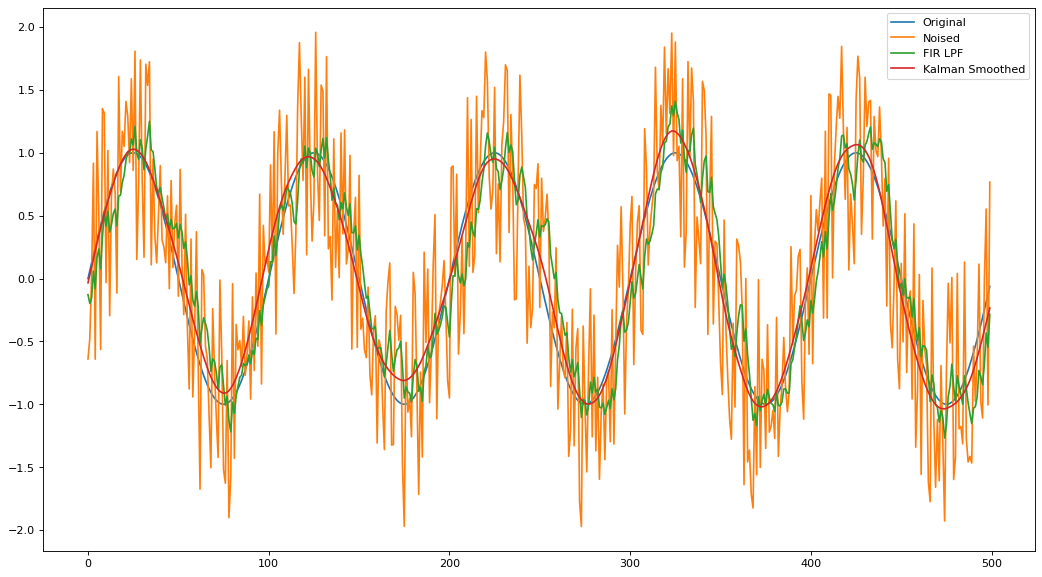

In [7]:
# Created by Toshihiko Arai.
# https://101010.fun/programming/python-kalman.html

from matplotlib import pyplot as plt
from random import randint
import math
from pykalman import KalmanFilter
import numpy as np


def sine_wave(samplerate, frequency):
    x = list(range(samplerate))
    y = [math.sin(i*2*math.pi/samplerate*frequency) for i in x]
    return x, y


def add_noise(values):
    noise = [randint(-100, 100) * 0.01 for _ in values]
    y = [w + n for (w, n) in zip(values, noise)]
    return y

def filtered_kalman(values):
    kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                      transition_covariance=0.0001 * np.eye(2)) # np.eyeは単位行列
    smoothed = kf.em(values).smooth(values)[0]
    filtered = kf.em(values).filter(values)[0]
    return smoothed, filtered



def filtered_lowpass(values):
    res = [0 for _ in values]
    k = 0.2
    i = 0
    for a in values:
        try:
            b = res[i - 1]
        except:
            b = 0
        res[i] = k * a + (1-k) * b
        i += 1
    return res


if __name__ == '__main__':
    x, sine_y = sine_wave(500, 5)
    noised_y = add_noise(sine_y)
    smoothed, filtered = filtered_kalman(noised_y)
    lowpass_y = filtered_lowpass(noised_y)

    plt.figure(figsize=(16, 9), dpi=80)
    plt.plot(x, sine_y, label='Original')
    plt.plot(x, noised_y, label='Noised')
    plt.plot(x, lowpass_y, label='FIR LPF')
    plt.plot(x, smoothed[:, 0], label='Kalman Smoothed')
    # plt.plot(x, filtered[:, 0], label='Filtered')
    plt.legend()
    plt.show()